In [1]:
using Plots
gr()
plot(rand(3), rand(3))
nothing

$$ y_{k+1} = y_k + \delta f(t_k, y_k) $$

In [21]:
function euler(t0, y0 :: Real, f, tN, N)
    δ = (tN - t0) / N
    y = zeros(N + 1)
    y[1] = y0
    t = range(t0, tN, length=N+1)
    for k = 1:N
        y[k+1] = y[k] + δ * f(t[k], y[k])
    end
    return t, y
end

euler (generic function with 2 methods)

In [116]:
function runge_kutta(t0, y0 :: Real, f, tN, N)
    δ = (tN - t0) / N
    y = zeros(N + 1)
    y[1] = y0
    t = range(t0, tN, length=N+1)
    for k = 1:N
        k1 = f(t[k], y[k])
        k2 = f(t[k] + 0.5, y[k] + δ * k1 / 2)
        k3 = f(t[k] + 0.5, y[k] + δ * k2 / 2)
        k4 = f(t[k+1], y[k] + δ * k3)
        y[k+1] = y[k] + δ * (k1 + 2k2 + 2k3 + k4) / 6
    end
    return t, y
end

runge_kutta (generic function with 2 methods)

## Exemplo 1

$$ y'(t) = y, \qquad y(0) = 1 $$

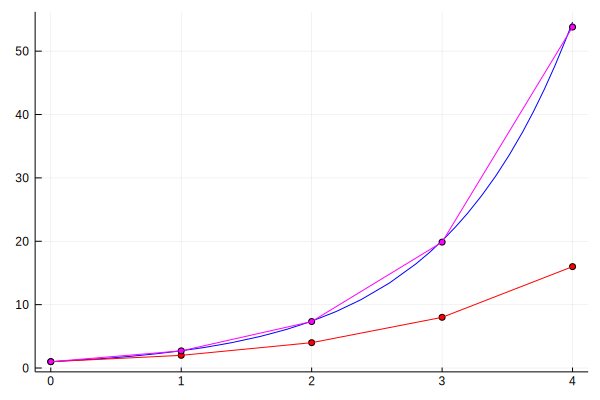

In [117]:
f(t,y) = y
t0 = 0.0
tN = 4.0
y0 = 1.0
N = 4
t, y = euler(t0, y0, f, tN, N)
plot(t -> exp(t), t0, tN, c=:blue)
scatter!(t, y, ms=3, c=:red, leg=false)
plot!(t, y, c=:red)
t, y = runge_kutta(t0, y0, f, tN, N)
scatter!(t, y, ms=3, c=:magenta, leg=false)
plot!(t, y, c=:magenta)

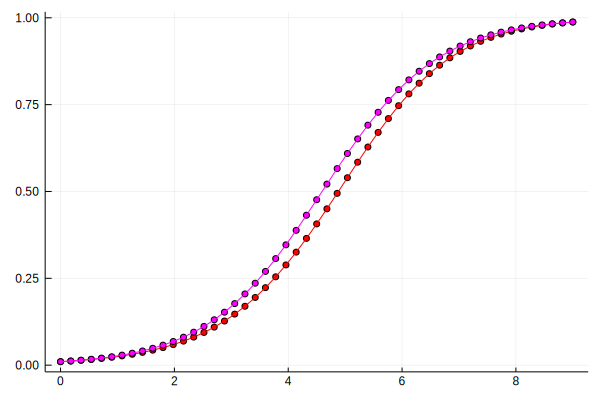

In [118]:
f(t,y) = y * (1 - y)
t0 = 0.0
tN = 9.0
y0 = 0.01
N = 50
t, y = euler(t0, y0, f, tN, N)
#plot(t -> exp(t), t0, tN, c=:blue)
scatter(t, y, ms=3, c=:red, leg=false)
plot!(t, y, c=:red)
t, y = runge_kutta(t0, y0, f, tN, N)
scatter!(t, y, ms=3, c=:magenta, leg=false)
plot!(t, y, c=:magenta)

In [22]:
function euler(t0, y0 :: Vector, f, tN, N)
    δ = (tN - t0) / N
    m = length(y0)
    y = zeros(m, N + 1)
    y[:,1] = y0
    t = range(t0, tN, length=N+1)
    for k = 1:N
        y[:,k+1] = y[:,k] + δ * f(t[k], y[:,k])
    end
    return t, y
end

euler (generic function with 3 methods)

In [35]:
function runge_kutta(t0, y0 :: Vector, f, tN, N)
    δ = (tN - t0) / N
    m = length(y0)
    y = zeros(m, N + 1)
    y[:,1] = y0
    t = range(t0, tN, length=N+1)
    for k = 1:N
        k1 = f(t[k], y[:,k])
        k2 = f(t[k] + 0.5, y[:,k] + δ * k1 / 2)
        k3 = f(t[k] + 0.5, y[:,k] + δ * k2 / 2)
        k4 = f(t[k+1], y[:,k] + δ * k3)
        y[:,k+1] = y[:,k] + δ * (k1 + 2k2 + 2k3 + k4) / 6
    end
    return t, y
end

runge_kutta (generic function with 2 methods)

## Presa-presador

- $x$ - presa
- $y$ - predador

$$ x'(t) = \alpha x(t) - \beta x(t) y(t) $$
$$ y'(t) = \delta x(t) y(t) - \gamma y(t) $$

┌ Info: Saved animation to 
│   fn = /home/abel/Documents/aulas/notebooks/presa-predador-1.gif
└ @ Plots /home/abel/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/home/abel/Documents/aulas/notebooks/presa-predador-1.gif")
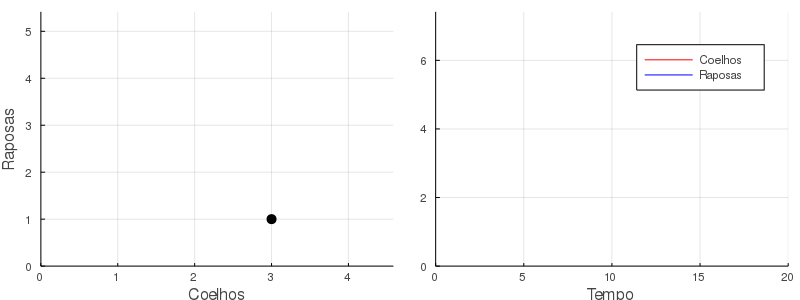

In [27]:
y0 = [3.0; 1.0]
t0 = 0.0
tf = 20.0
α = 1.0
β = 0.5
γ = 0.5
δ = 0.75
N = 1000

F(t, y) = [α * y[1] - β * y[1] * y[2]; γ * y[1] * y[2] - δ * y[2]]
t, Y = euler(t0, y0, F, tf, N)

anim = Animation()
for i = 1:4:N
    layout = @layout [a b]
    p = plot(size=(800,300), layout=layout)
    xi, yi = Y[:,i]
    plot!(p[1], Y[1,1:i], Y[2,1:i], c=:black, leg=false)
    scatter!(p[1], [xi], [yi], c=:black, ms=5)
    xlabel!(p[1], "Coelhos")
    ylabel!(p[1], "Raposas")
    xlims!(p[1], 0, maximum(Y[1,:]) + 0.5)
    ylims!(p[1], 0, maximum(Y[2,:]) + 0.5)
    plot!(p[2], t[1:i], Y[1,1:i], c=:red, lab="Coelhos")
    plot!(p[2], t[1:i], Y[2,1:i], c=:blue, lab="Raposas")
    xlims!(p[2], 0, t[end])
    ylims!(p[2], 0, maximum(Y) + 2.5)
    xlabel!(p[2], "Tempo")
    frame(anim)
end
gif(anim, "presa-predador-1.gif")

┌ Info: Saved animation to 
│   fn = /home/abel/Documents/aulas/notebooks/presa-predador-1.gif
└ @ Plots /home/abel/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/home/abel/Documents/aulas/notebooks/presa-predador-1.gif")
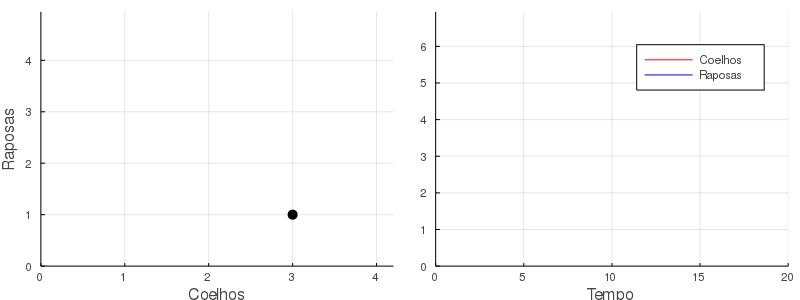

In [37]:
y0 = [3.0; 1.0]
t0 = 0.0
tf = 20.0
α = 1.0
β = 0.5
γ = 0.5
δ = 0.75
N = 200

F(t, y) = [α * y[1] - β * y[1] * y[2]; γ * y[1] * y[2] - δ * y[2]]
t, Y = runge_kutta(t0, y0, F, tf, N)

anim = Animation()
for i = 1:N
    layout = @layout [a b]
    p = plot(size=(800,300), layout=layout)
    xi, yi = Y[:,i]
    plot!(p[1], Y[1,1:i], Y[2,1:i], c=:black, leg=false)
    scatter!(p[1], [xi], [yi], c=:black, ms=5)
    xlabel!(p[1], "Coelhos")
    ylabel!(p[1], "Raposas")
    xlims!(p[1], 0, maximum(Y[1,:]) + 0.5)
    ylims!(p[1], 0, maximum(Y[2,:]) + 0.5)
    plot!(p[2], t[1:i], Y[1,1:i], c=:red, lab="Coelhos")
    plot!(p[2], t[1:i], Y[2,1:i], c=:blue, lab="Raposas")
    xlims!(p[2], 0, t[end])
    ylims!(p[2], 0, maximum(Y) + 2.5)
    xlabel!(p[2], "Tempo")
    frame(anim)
end
gif(anim, "presa-predador-1.gif")

# Modelo SIR

$$ \begin{align}
S'(t) & = -\frac{\beta}{T} I S \\
I'(t) & = \frac{\beta}{T} I S - \gamma I \\
R'(t) & = \gamma I
\end{align} $$

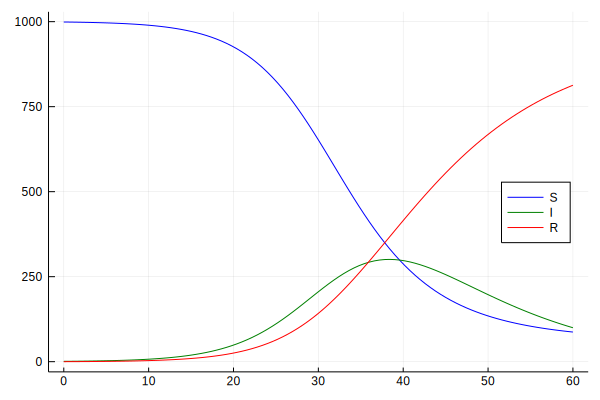

In [53]:
T = 1000.0
β = 0.3
γ = 0.1

#y = [S, I, R]
F(t,y) = [-β / T * y[2] * y[1]; 
           β / T * y[2] * y[1] - γ * y[2];
           γ * y[2]]

t0 = 0.0
y0 = [T - 1; 1.0; 0.0]
tf = 60.0
N = 100
t, y = runge_kutta(t0, y0, F, tf, N)
plot(t, y[1,:], c=:blue, lab="S", legend=:right)
plot!(t, y[2,:], c=:green, lab="I")
plot!(t, y[3,:], c=:red, lab="R")

In [55]:
?download

search: download



```
download(url::AbstractString, [localfile::AbstractString])
```

Download a file from the given url, optionally renaming it to the given local file name. If no filename is given this will download into a randomly-named file in your temp directory. Note that this function relies on the availability of external tools such as `curl`, `wget` or `fetch` to download the file and is provided for convenience. For production use or situations in which more options are needed, please use a package that provides the desired functionality instead.

Returns the filename of the downloaded file.


In [56]:
download("https://github.com/datasets/covid-19/blob/master/data/time-series-19-covid-combined.csv?raw=true", "covid-full.csv")

"covid-full.csv"

In [60]:
using CSV, DataFrames
data = CSV.read("covid-full.csv")
first(data, 5)

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered
,Dates…,String,String⍰,Float64,Float64,Int64,Int64
1,2020-01-22,Thailand,missing,15.0,101.0,2,0
2,2020-01-23,Thailand,missing,15.0,101.0,3,0
3,2020-01-24,Thailand,missing,15.0,101.0,5,0
4,2020-01-25,Thailand,missing,15.0,101.0,7,0
5,2020-01-26,Thailand,missing,15.0,101.0,8,2


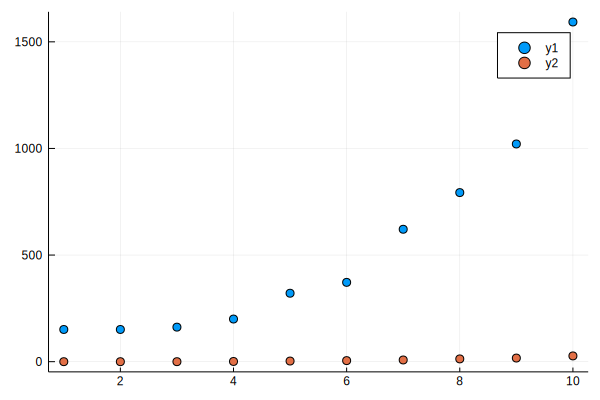

In [193]:
df = data[findall(data[!,Symbol("Country/Region")] .== "Brazil"),:]

C = df.Confirmed
idx = findfirst(C .≥ 100)
C = C[idx:end]
R = df.Recovered[idx:end] + df.Deaths[idx:end]
scatter(C)
scatter!(R)

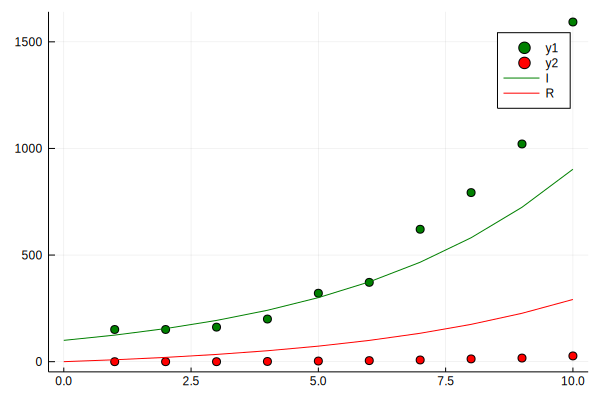

In [194]:
T = 60_000_000
β = 0.30
γ = 0.08

#y = [S, I, R]
F(t,y) = [-β / T * y[2] * y[1]; 
           β / T * y[2] * y[1] - γ * y[2];
           γ * y[2]]

t0 = 0.0
y0 = [T - 100; 100.0; 0.0]
tf = length(C)
N = length(C)
t, y = runge_kutta(t0, y0, F, tf, N)
#plot(t, y[1,:], c=:blue, lab="S", legend=:right)
scatter(C, c=:green)
scatter!(R, c=:red)
plot!(t, y[2,:], c=:green, lab="I")
plot!(t, y[3,:], c=:red, lab="R")

## Otimização sem derivada para encontrar os parâmetros da EDO

In [109]:
using Pkg
pkg"add https://github.com/CiDAMO/DerivativeFreeSolvers.jl"

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %  Updating git-repo `https://github.com/CiDAMO/DerivativeFreeSolvers.jl`
Fetching: [========================================>]  100.0 %.0 %  Updating git-repo `https://github.com/CiDAMO/DerivativeFreeSolvers.jl`
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
  [704b706e] + DerivativeFreeSolvers v0.1.0 #master (https://github.com/CiDAMO/DerivativeFreeSolvers.jl)
  Updating `~/.julia/environments/v1.3/Manifest.toml`
  [704b706e] + DerivativeFreeSolvers v0.1.0 #master (https://github.com/CiDAMO/DerivativeFreeSolvers.jl)
  [e30172f5] ↑ Documenter v0.24.6 ⇒ v0.24.7
  [1914dd2f] ↑ MacroTools v0.5.4 ⇒ v0.5.5


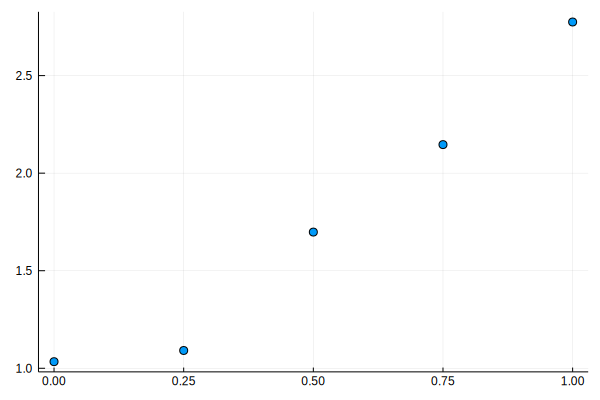

In [155]:
t = range(0, 1, length=5)
y = exp.(t) + randn(5) * 0.1
scatter(t, y, leg=false)

$$ y'(t) = \alpha y(t) \qquad y'(0) = y_0. $$

In [156]:
# β₁ = y₀, β₂ = α
function sqr(β)
    f(t, y) = β[2] * y
    t_rk, y_rk = runge_kutta(0.0, β[1], (t,y) -> β[2] * y, 1.0, 4)
    SQR = 0.0
    for i = 1:5
        SQR += (y[i] - y_rk[i])^2
    end
    return SQR / 2
end

sqr (generic function with 1 method)

In [131]:
using DerivativeFreeSolvers, NLPModels

mutable struct NLPSQR <: AbstractNLPModel
    meta :: NLPModelMeta
    counters :: Counters
end

In [157]:
function NLPSQR()
    return NLPSQR(NLPModelMeta(2, x0=[1.0; 1.0]), Counters())
end

function NLPModels.obj(nlp :: NLPSQR, β :: AbstractVector)
    return sqr(β)
end

nlp = NLPSQR()
output = nelder_mead(nlp)

┌ Info:   iter      f(x)  ‖x₁ - xₙ₊₁‖  
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:55
┌ Info:      0   2.2e-02   5.0e-02
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:      1   2.2e-02   5.0e-02
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:      2   2.0e-02   4.0e-02
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:      3   1.8e-02   4.0e-02
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:      4   1.8e-02   7.1e-02
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:      5   1.8e-02   1.1e-02
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:      6   1.8e-02   1.

"Execution stats: solved to within acceptable tolerances"

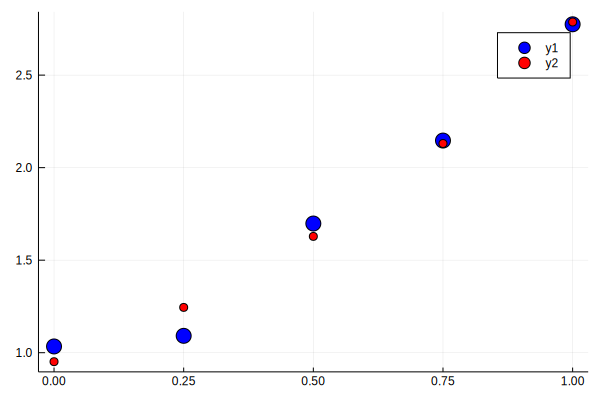

In [159]:
β = output.solution
f(t, y) = β[2] * y
scatter(t, y, c=:blue, ms=8)
t_rk, y_rk = runge_kutta(t0, β[1], f, 1.0, 4)
scatter!(t_rk, y_rk, c=:red)

In [235]:
df = data[findall(data[!,Symbol("Country/Region")] .== "Italy"),:]

C = df.Confirmed
idx = findfirst(C .≥ 100)
C = C[idx:end]
R = df.Recovered[idx:end] + df.Deaths[idx:end]
scatter(C)
scatter!(R)

# β₁ = β, β₂ = γ, β₃ = T
function sqr(β)
    f(t, y) = β[2] * y
    t_rk, y_rk = runge_kutta(0.0, [exp(β[3]) - β[4]; β[4]; 0.0],
        (t,y) -> [-β[1] / exp(β[3]) * y[2] * y[1]; 
                   β[1] / exp(β[3]) * y[2] * y[1] - β[2] * y[2];
                   β[2] * y[2]],
        length(C)-1, length(C)-1)
    SQR = 0.0
    for i = 1:length(C)
        SQR += (C[i] - y_rk[2,i])^2
        SQR += (R[i] - y_rk[3,i])^2
    end
    return SQR / 2
end

function NLPSQR()
    return NLPSQR(NLPModelMeta(4, x0=[0.30; 0.08; log(60_000_000); 100]), Counters())
    #return NLPSQR(NLPModelMeta(3, x0=[0.00; 0.00; 10000]), Counters())
end

function NLPModels.obj(nlp :: NLPSQR, β :: AbstractVector)
    return sqr(β)
end

nlp = NLPSQR()
output = nelder_mead(nlp)

┌ Info:   iter      f(x)  ‖x₁ - xₙ₊₁‖  
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:55
┌ Info:      0   1.3e+09   7.1e-02
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:      1   1.3e+09   2.4e-02
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:      2   1.3e+09   1.2e-02
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:      3   1.3e+09   6.0e-03
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:      4   7.3e+08   1.4e-02
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:      5   6.3e+08   1.5e-02
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:      6   5.7e+08   1.

┌ Info:     71   4.9e+08   6.5e-04
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:     72   4.9e+08   9.3e-04
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:     73   4.9e+08   8.2e-04
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:     74   4.9e+08   9.0e-04
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:     75   4.9e+08   1.8e-03
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:     76   4.9e+08   1.9e-03
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:     77   4.9e+08   2.1e-03
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:     78   4.9e+08   3.8e-03

┌ Info:    145   2.7e+08   2.8e-03
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:    146   2.7e+08   1.8e-01
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:    147   2.7e+08   1.2e-01
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:    148   2.7e+08   1.1e-01
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:    149   2.7e+08   2.6e-02
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:    150   2.7e+08   5.0e-03
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:    151   2.7e+08   2.1e-02
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:    152   2.7e+08   7.7e-02

┌ Info:    219   4.4e+07   1.2e-03
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:    220   4.4e+07   1.3e-03
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:    221   4.4e+07   9.6e-04
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:    222   4.4e+07   4.4e-04
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:    223   4.4e+07   3.1e-04
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:    224   4.4e+07   1.2e-04
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:    225   4.4e+07   7.6e-04
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:    226   4.4e+07   5.1e-05

┌ Info:    293   4.4e+07   2.9e-07
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:    294   4.4e+07   3.3e-07
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:    295   4.4e+07   3.2e-07
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:    296   4.4e+07   6.7e-08
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:    297   4.4e+07   2.4e-08
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:    298   4.4e+07   3.3e-07
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:    299   4.4e+07   9.5e-08
└ @ DerivativeFreeSolvers /home/abel/.julia/packages/DerivativeFreeSolvers/Kot19/src/nelder_mead.jl:65
┌ Info:    300   4.4e+07   2.1e-08

"Execution stats: solved to within acceptable tolerances"

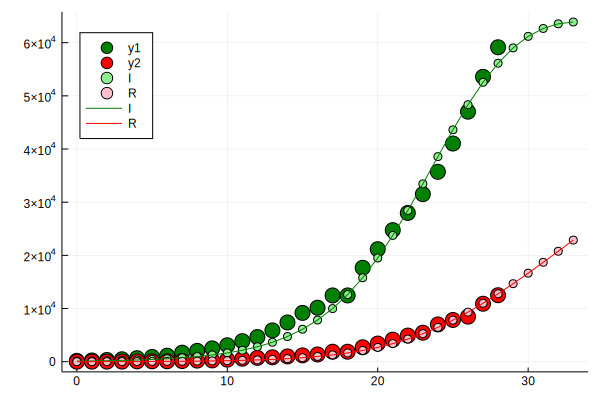

In [241]:
β = output.solution

F(t,y) = [-β[1] / exp(β[3]) * y[2] * y[1]; 
           β[1] / exp(β[3]) * y[2] * y[1] - β[2] * y[2];
           β[2] * y[2]]

t0 = 0.0
y0 = [exp(β[3]) - β[4]; β[4]; 0.0]
next = 5
tf = length(C) - 1 + next
N = length(C) - 1 + next
t, y = runge_kutta(t0, y0, F, tf, N)
#plot(t, y[1,:], c=:blue, lab="S", legend=:right)
scatter(t[1:length(C)], C, c=:green, ms=8)
scatter!(t[1:length(R)], R, c=:red, ms=8)
scatter!(t, y[2,:], c=:lightgreen, lab="I")
scatter!(t, y[3,:], c=:pink, lab="R")
plot!(t, y[2,:], c=:green, lab="I")
plot!(t, y[3,:], c=:red, lab="R")
plot!(leg=:topleft)

In [237]:
output.solution

4-element Array{Float64,1}:
   0.30705466521223945
   0.03290838102890466
  11.49042001391134   
 108.21901474823105   